In [8]:
def finds_mu(eigvals, N_electrons,beta):
    mu_min = -10/beta + eigvals.min()
    mu_max = 10/beta + eigvals.max()
    mu_mid = (mu_min + mu_max)/2
    while np.abs(np.sum(1/(1+ np.exp(beta*(eigvals-mu_mid))))-N_electrons) > 1e-3:
        if np.sum(1/(1+ np.exp(beta*(eigvals-mu_mid)))) > N_electrons:
            mu_max = mu_mid
        else:
            mu_min = mu_mid
        mu_mid = (mu_min + mu_max)/2
    return mu_mid

In [60]:
from src.models import *
from tqdm import tqdm

n = 101
h = 1/n 
xs = np.linspace(0, 1, n+1)
xs = xs[:-1]

a = .3 
V = -1 * np.diag( np.sqrt(1./((np.cos(4*np.pi*xs)+1) + a**2)))
L = np.zeros([n, n]) 
for i in range(n-1):
    L[i,i] = 2
    L[i,i+1] = 1
    L[i+1, i] = 1

L[-1,-1] = 2
L[0, -1] = -1
L[-1, 0] = -1 
L = L/(h**2)
# L = -genDiscretizedLaplacian((101,),(1,))
print(L[:5,:5])
K = 2*(1 - np.sqrt(1-np.cos(2*np.pi*(xs.reshape([-1, 1]) - xs))))
# K = genDiscretizedYukawaInteraction((101,),(1,),alpha=0)
print(K[:5,:5])

H0 = .01*0.5*L + V
H0 = (H0+ H0.T)/2 
beta = 1
mu = 0
N_electrons = 2

max_iter = 20
X_scf = np.eye(n)/2

for i in range(max_iter):
    X_scf_prev = X_scf 
    rho = np.diag(X_scf) 
    VH = K.dot(rho.reshape([-1,1]))
    # print(VH.shape) 
    ham = H0 + np.diag(VH.flatten())
    w,V = np.linalg.eig(ham)
    mu = finds_mu(w, N_electrons, beta) 
    w1 = 1/(1+ np.exp(beta*(w-mu)))
    X_scf = V@np.diag(w1)@(V.T)

print(np.linalg.norm(X_scf - X_scf_prev)) 

print('mu',mu) 
print(rho[:20])


[[20402. 10201.     0.     0.     0.]
 [10201. 20402. 10201.     0.     0.]
 [    0. 10201. 20402. 10201.     0.]
 [    0.     0. 10201. 20402. 10201.]
 [    0.     0.     0. 10201. 20402.]]
[[2.         1.91203631 1.82415771 1.73644923 1.64899572]
 [1.91203631 2.         1.91203631 1.82415771 1.73644923]
 [1.82415771 1.91203631 2.         1.91203631 1.82415771]
 [1.73644923 1.82415771 1.91203631 2.         1.91203631]
 [1.64899572 1.73644923 1.82415771 1.91203631 2.        ]]
7.134439843710791e-13
mu -1.297568349158176
[0.01280451 0.01281169 0.01283349 0.01287069 0.01292464 0.01299737
 0.01309182 0.01321211 0.01336403 0.01355584 0.01379927 0.01411096
 0.01451428 0.01504138 0.01573535 0.01665182 0.01785918 0.01943591
 0.02146272 0.02400644]


In [62]:
rho = rho.reshape([-1,1])

print(rho.T.dot(K).dot(rho))


[[0.8794843]]


[2.]
(101, 101)


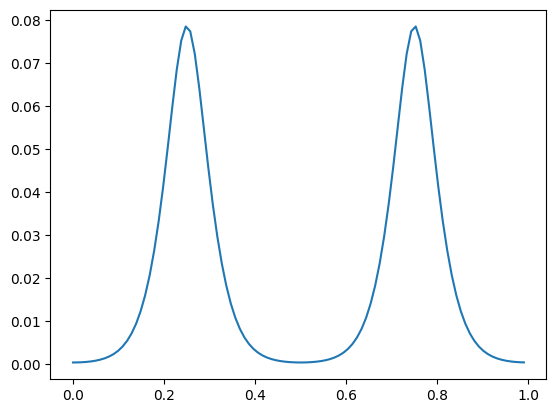

In [54]:
print(sum(rho))
print(K.shape)
plt.figure()

plt.plot(xs, rho)
plt.show()